In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from bs4 import BeautifulSoup
import requests
import sys
import pickle
from sklearn.neighbors import KNeighborsClassifier
import re
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from bs4 import BeautifulSoup, Comment


import pprint
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import seaborn as sns
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

style.use('seaborn-whitegrid')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
import pandas as pd
import requests



train_df=pd.read_csv('train.csv')

test_df=pd.read_csv('test.csv')

In [12]:
train_df

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0                221             232            148  ...            0   
1                220             235            151  ...            0   
2                234             238            135  ...            0   
3                238             238            122  ...            0   
4                220             234            150  ...            0   
...              ...             ...            ...  ...          ...   
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0                0            0            0           5  
1                0            0            0           5  
2                0            0            0           2  
3                0            0            0           2  
4                0            0            0           5  
...            ...          ...          ...         ...  
15115            0           

In [25]:
train_df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [103]:
rf_initial=RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True) 
rf_initial.fit(train_df.iloc[:,1:-1].values, train_df.iloc[:,-1:].values.ravel()) 
print("Initial Train score: %.2f" %rf_initial.score(train_df.iloc[:,1:-1].values, train_df.iloc[:,-1:].values.ravel())) 



Initial Train score: 1.00


In [104]:
def importances(estimator, col_array, title): 
    importances = estimator.feature_importances_ 
    indices = np.argsort(importances)[::-1] 
    print("%s Top 20 Important Features\n" %title) 
    for f in range(20): 
        print("%d. %s (%f)" % (f + 1, col_array.columns[indices[f]], importances[indices[f]])) 
    print("\nMean Feature Importance %.6f" %np.mean(importances))
    
    
    
    
    indices=indices[:10] 
    plt.figure() 
    plt.title(title+" Top 10 Feature importances") 
    plt.bar(range(10), importances[indices], color="gr", align="center") 
    plt.xticks(range(10), col_array.columns[indices], fontsize=14, rotation=90) 
    plt.xlim([-1, 10]) 
    plt.show() 
            
            
            
            
            

Cover Type (Initial RF) Top 20 Important Features

1. Elevation (0.226601)
2. Horizontal_Distance_To_Roadways (0.092537)
3. Horizontal_Distance_To_Fire_Points (0.073647)
4. Horizontal_Distance_To_Hydrology (0.063080)
5. Vertical_Distance_To_Hydrology (0.053317)
6. Hillshade_9am (0.050963)
7. Aspect (0.049655)
8. Hillshade_3pm (0.046099)
9. Hillshade_Noon (0.044689)
10. Wilderness_Area4 (0.043411)
11. Slope (0.035985)
12. Soil_Type10 (0.022945)
13. Soil_Type38 (0.019939)
14. Wilderness_Area1 (0.018973)
15. Soil_Type3 (0.018605)
16. Soil_Type39 (0.017888)
17. Wilderness_Area3 (0.017159)
18. Soil_Type4 (0.012319)
19. Soil_Type40 (0.010254)
20. Soil_Type30 (0.007676)

Mean Feature Importance 0.018519


<ipython-input-104-cd488d4e59fe>:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(10), importances[indices], color="gr", align="center")


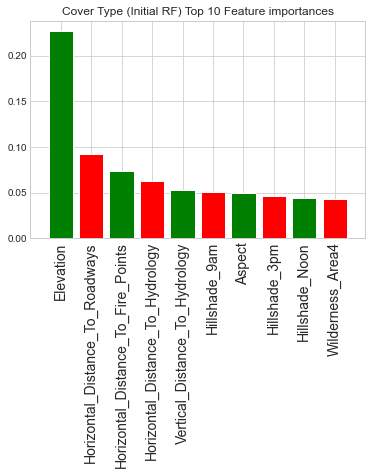

In [115]:
importances(rf_initial, train_df.iloc[:,1:], 'Cover Type (Initial RF)')

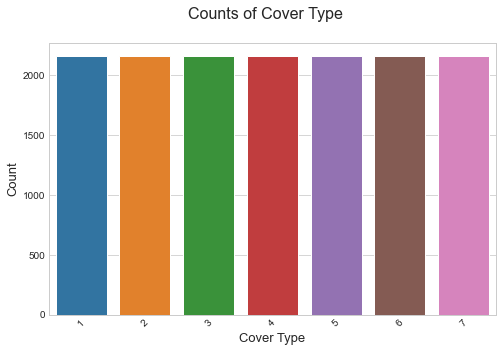

In [18]:
# Set plot style
sns.set_style("whitegrid")

# Set plot size
plt.figure(figsize=(8,5))

# Plot distribution of tonic_note
sns.countplot(x='Cover_Type', data=train_df)

# Style graph
plt.suptitle('Counts of Cover Type', size=16)
plt.xlabel('Cover Type', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Elevation VS Slope')

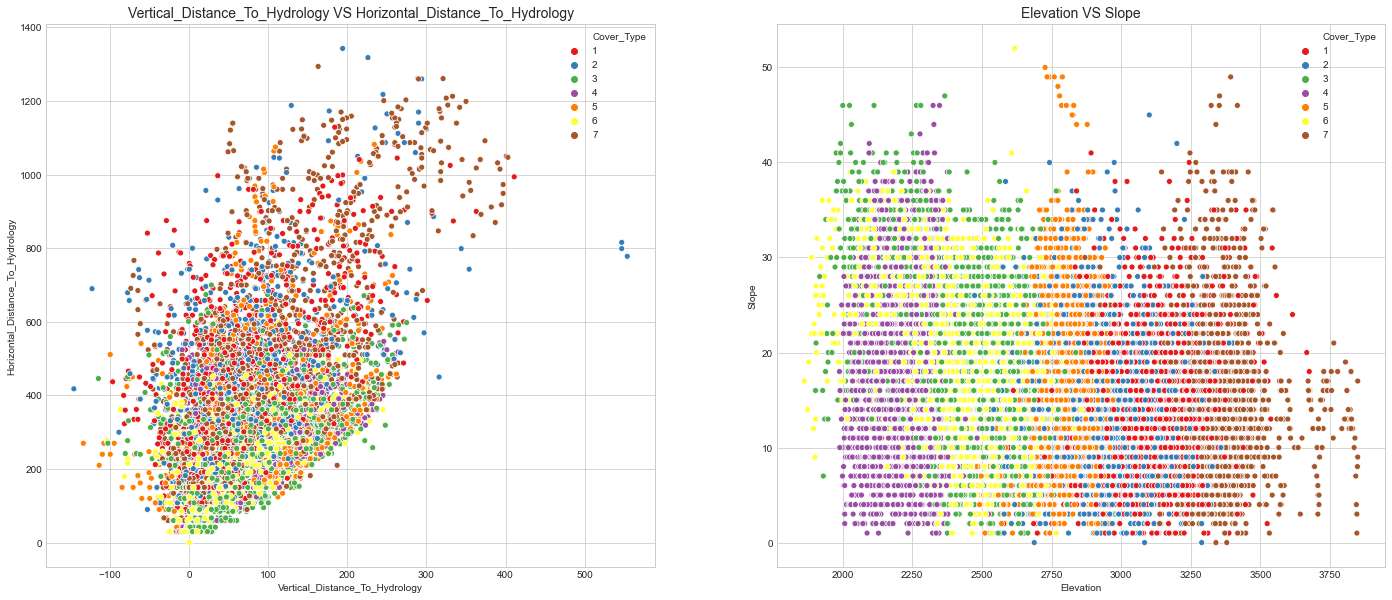

In [22]:
plt.figure(figsize=(24, 10))

# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Vertical_Distance_To_Hydrology", y="Horizontal_Distance_To_Hydrology", 
                hue="Cover_Type", data=train_df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Vertical_Distance_To_Hydrology VS Horizontal_Distance_To_Hydrology", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Elevation", y="Slope", 
                hue="Cover_Type", data=train_df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Elevation VS Slope", size=14)

Text(0.5, 1.0, 'Hillshade_9am VS Hillshade_3pm')

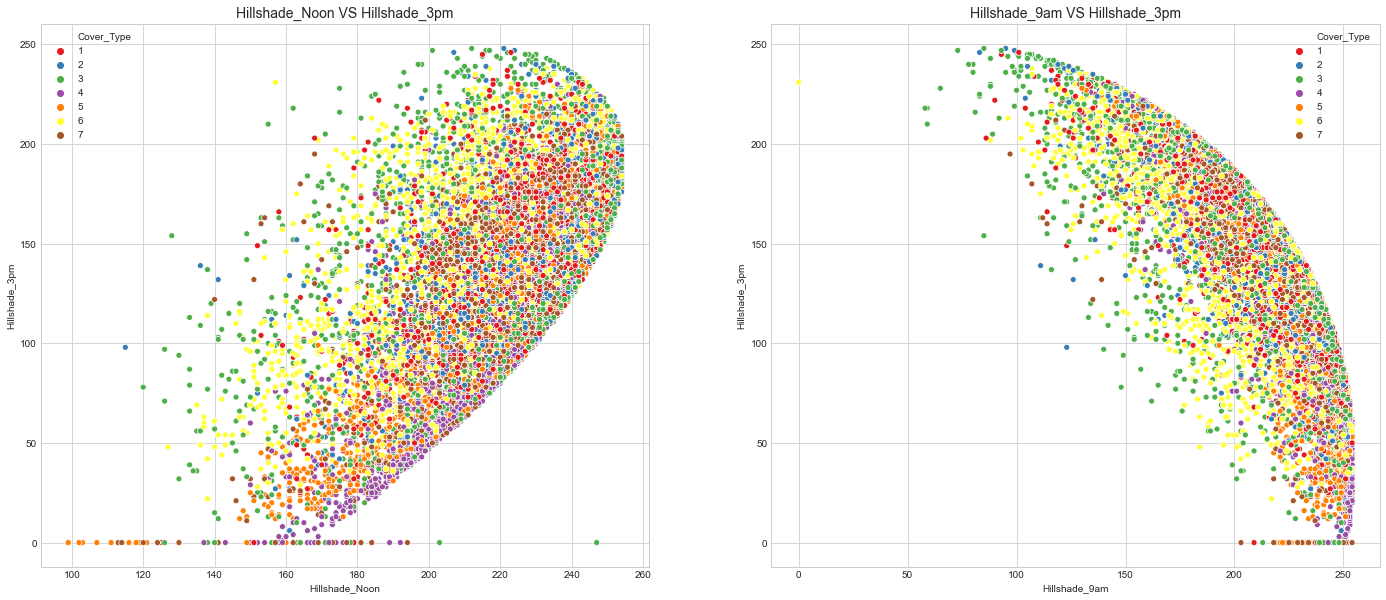

In [24]:
plt.figure(figsize=(24, 10))
# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Hillshade_Noon", y="Hillshade_3pm", 
                hue="Cover_Type", data=train_df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_Noon VS Hillshade_3pm", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Hillshade_9am", y="Hillshade_3pm", 
                hue="Cover_Type", data=train_df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_9am VS Hillshade_3pm", size=14)

Text(0.5, 1.0, 'Hillshade_9am VS Hillshade_3pm')

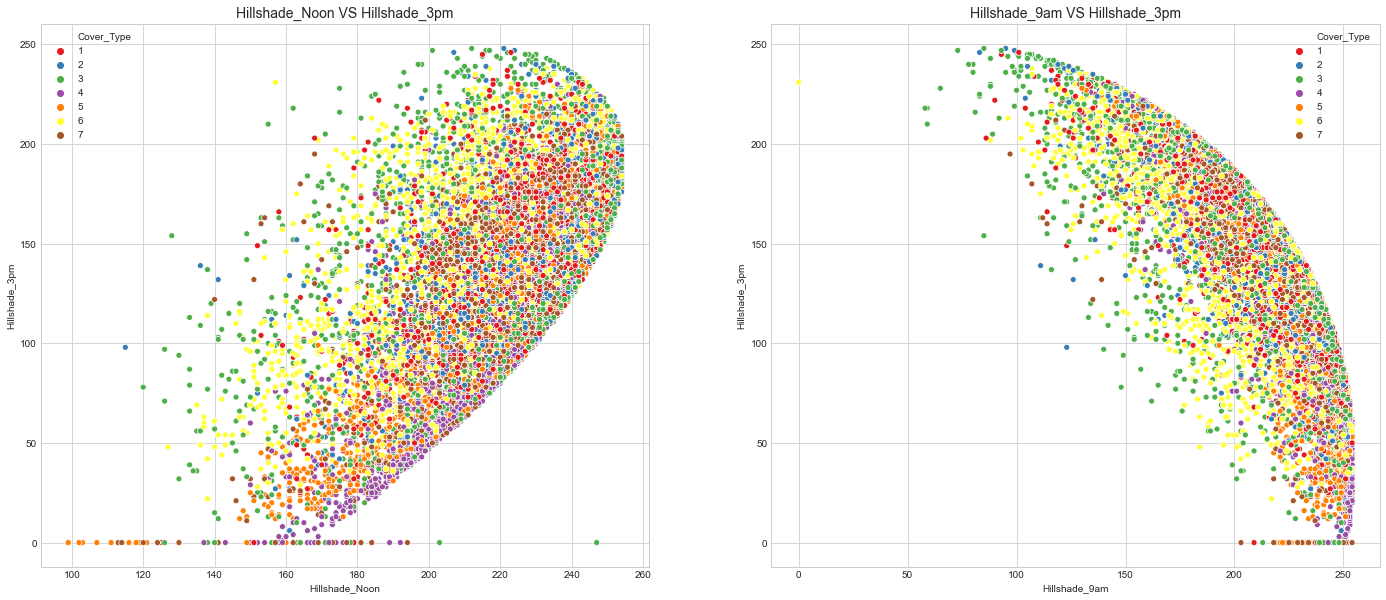

In [207]:
plt.figure(figsize=(24, 10))
# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Hillshade_Noon", y="Hillshade_3pm", 
                hue="Cover_Type", data=train_df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_Noon VS Hillshade_3pm", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Hillshade_9am", y="Hillshade_3pm", 
                hue="Cover_Type", data=train_df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_9am VS Hillshade_3pm", size=14)

In [26]:
correlations_transformed = pd.DataFrame(train_df.corr())
correlations_transformed = pd.DataFrame(correlations_transformed["Cover_Type"]).reset_index()


correlations_transformed.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed = (correlations_transformed[correlations_transformed["Feature"] != "Cover_Type"]
                .sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed)

Feature  Correlation with Cover_Type
11                    Wilderness_Area1                    -0.230117
43                         Soil_Type29                    -0.218564
36                         Soil_Type22                    -0.195993
37                         Soil_Type23                    -0.158762
46                         Soil_Type32                    -0.132312
26                         Soil_Type12                    -0.129985
6      Horizontal_Distance_To_Roadways                    -0.105662
38                         Soil_Type24                    -0.100797
8                       Hillshade_Noon                    -0.098905
10  Horizontal_Distance_To_Fire_Points                    -0.089389
45                         Soil_Type31                    -0.079882
47                         Soil_Type33                    -0.078955
9                        Hillshade_3pm                    -0.053399
34                         Soil_Type20                    -0.053013
33                         Soil_Type19                    -0.031824
18                          Soil_Type4                    -0.027816
23                          Soil_Type9                    -0.027012
35                         Soil_Type21                    -0.024410
41                         Soil_Type27                    -0.023109
40                         Soil_Type26                    -0.017184
17                          Soil_Type3                    -0.016393
42                         Soil_Type28                    -0.012202
4     Horizontal_Distance_To_Hydrology                    -0.010515
7                        Hillshade_9am                    -0.010286
39                         Soil_Type25                    -0.008133
22                          Soil_Type8                    -0.008133
48                         Soil_Type34                    -0.003470
44                         Soil_Type30                     0.001393
32                         Soil_Type18                     0.006312
20                          Soil_Type6                     0.006521
2                               Aspect                     0.008015
30                         Soil_Type16                     0.008793
25                         Soil_Type11                     0.010228
12                    Wilderness_Area2                     0.014994
15                          Soil_Type1                     0.015069
1                            Elevation                     0.016090
28                         Soil_Type14                     0.022019
16                          Soil_Type2                     0.022627
50                         Soil_Type36                     0.025726
19                          Soil_Type5                     0.027692
27                         Soil_Type13                     0.040528
31                         Soil_Type17                     0.042453
51                         Soil_Type37                     0.071210
5       Vertical_Distance_To_Hydrology                     0.075647
14                    Wilderness_Area4                     0.075774
3                                Slope                     0.087722
0                                   Id                     0.108363
49                         Soil_Type35                     0.114327
13                    Wilderness_Area3                     0.122146
24                         Soil_Type10                     0.128972
54                         Soil_Type40                     0.205851
53                         Soil_Type39                     0.240384
52                         Soil_Type38                     0.257810
21                          Soil_Type7                          NaN
29                         Soil_Type15                          NaN

In [81]:
X = train_df.drop(['Cover_Type', 'Id'], axis =1)
y = train_df['Cover_Type']


In [80]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [82]:
print('Training X Shape:', X_train.shape)
print('Validation X Shape:', X_valid.shape)

Training X Shape: (12096, 54)
Validation X Shape: (3024, 54)


In [83]:

print('Training y Shape:', y_train.shape)
print('Validation y Shape:', y_valid.shape)

Training y Shape: (12096,)
Validation y Shape: (3024,)


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train, y_train)


X_valid_scaled = scaler.transform(X_valid)



In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [116]:

def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    return accuracy_score(y_valid, y_predicted)

In [117]:
knn_classifier = KNeighborsClassifier()
knn_accuracy = fit_evaluate_model(knn_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", knn_accuracy)

Number of correct predictions made out of all predictions are: 0.7870370370370371


In [86]:
from sklearn.model_selection import cross_val_score

In [123]:
k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7857969576719577, 0.7523148148148149, 0.7676917989417991, 0.7559523809523809, 0.7572751322751322, 0.7528108465608465, 0.7451223544973544, 0.7433035714285715, 0.7377645502645502, 0.7360284391534392, 0.7314814814814815, 0.7296626984126985, 0.7285879629629629, 0.7253637566137566, 0.7223048941798943, 0.7189980158730158, 0.7162698412698413, 0.7120535714285715, 0.7078373015873015]


Text(0, 0.5, 'Cross-Validated Accuracy')

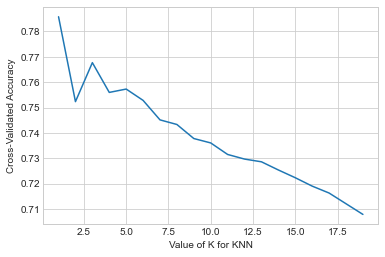

In [124]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [50]:
# import lightgbm as lgb

In [49]:
# from lightgbm import LGBMClassifier
# lgbm_classifier = LGBMClassifier()
# lgbm_accuracy = fit_evaluate_model(lgbm_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
# print("Number of correct predictions made out of all predictions are:", lgbm_accuracy)

In [130]:
xrf_classifier = ExtraTreesClassifier()
xrf_accuracy = fit_evaluate_model(xrf_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", xrf_accuracy)


Number of correct predictions made out of all predictions are: 0.8677248677248677


In [61]:
# from xgboost import XGBClassifier

In [55]:
# xgb_classifier = XGBClassifier()
# xgb_accuracy = fit_evaluate_model(xgb_classifier, X_train, y_train, X_valid, y_valid)
# print("Number of correct predictions made out of all predictions are:", xgb_accuracy)

In [ ]:
# sns.pairplot(X, corner=True, height=1.5, plot_kws={'size': 3}, hue='Cover_Type');

In [127]:


def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



def train_score(classifier,X_train_scaled, y_train, X_valid_scaled, y_valid):
    clf = classifier.fit(X_train_scaled, y_train)
    
    train_acc=clf.score(X_train_scaled, y_train)
    test_acc=clf.score(X_valid_scaled, y_valid)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = y_valid
    y_pred = clf.predict(X_valid_scaled)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    
    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.89
Test Data Accuracy:     0.80
[[289  75   1   0  19   4  46]
 [105 260  10   1  61  16   5]
 [  0   5 326  30   8  68   0]
 [  0   0  14 422   0  11   0]
 [  5   4  10   0 393   6   0]
 [  0   8  54  11   8 330   0]
 [ 18   2   0   0   0   2 397]]


Precision:              0.73
Recall:                 0.79


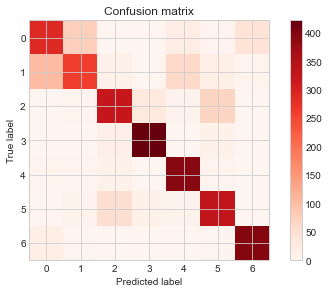

In [128]:

knn_cm= KNeighborsClassifier(n_neighbors=3)
train_score(knn_cm,X_train_scaled,y_train,X_valid_scaled,y_valid)

 

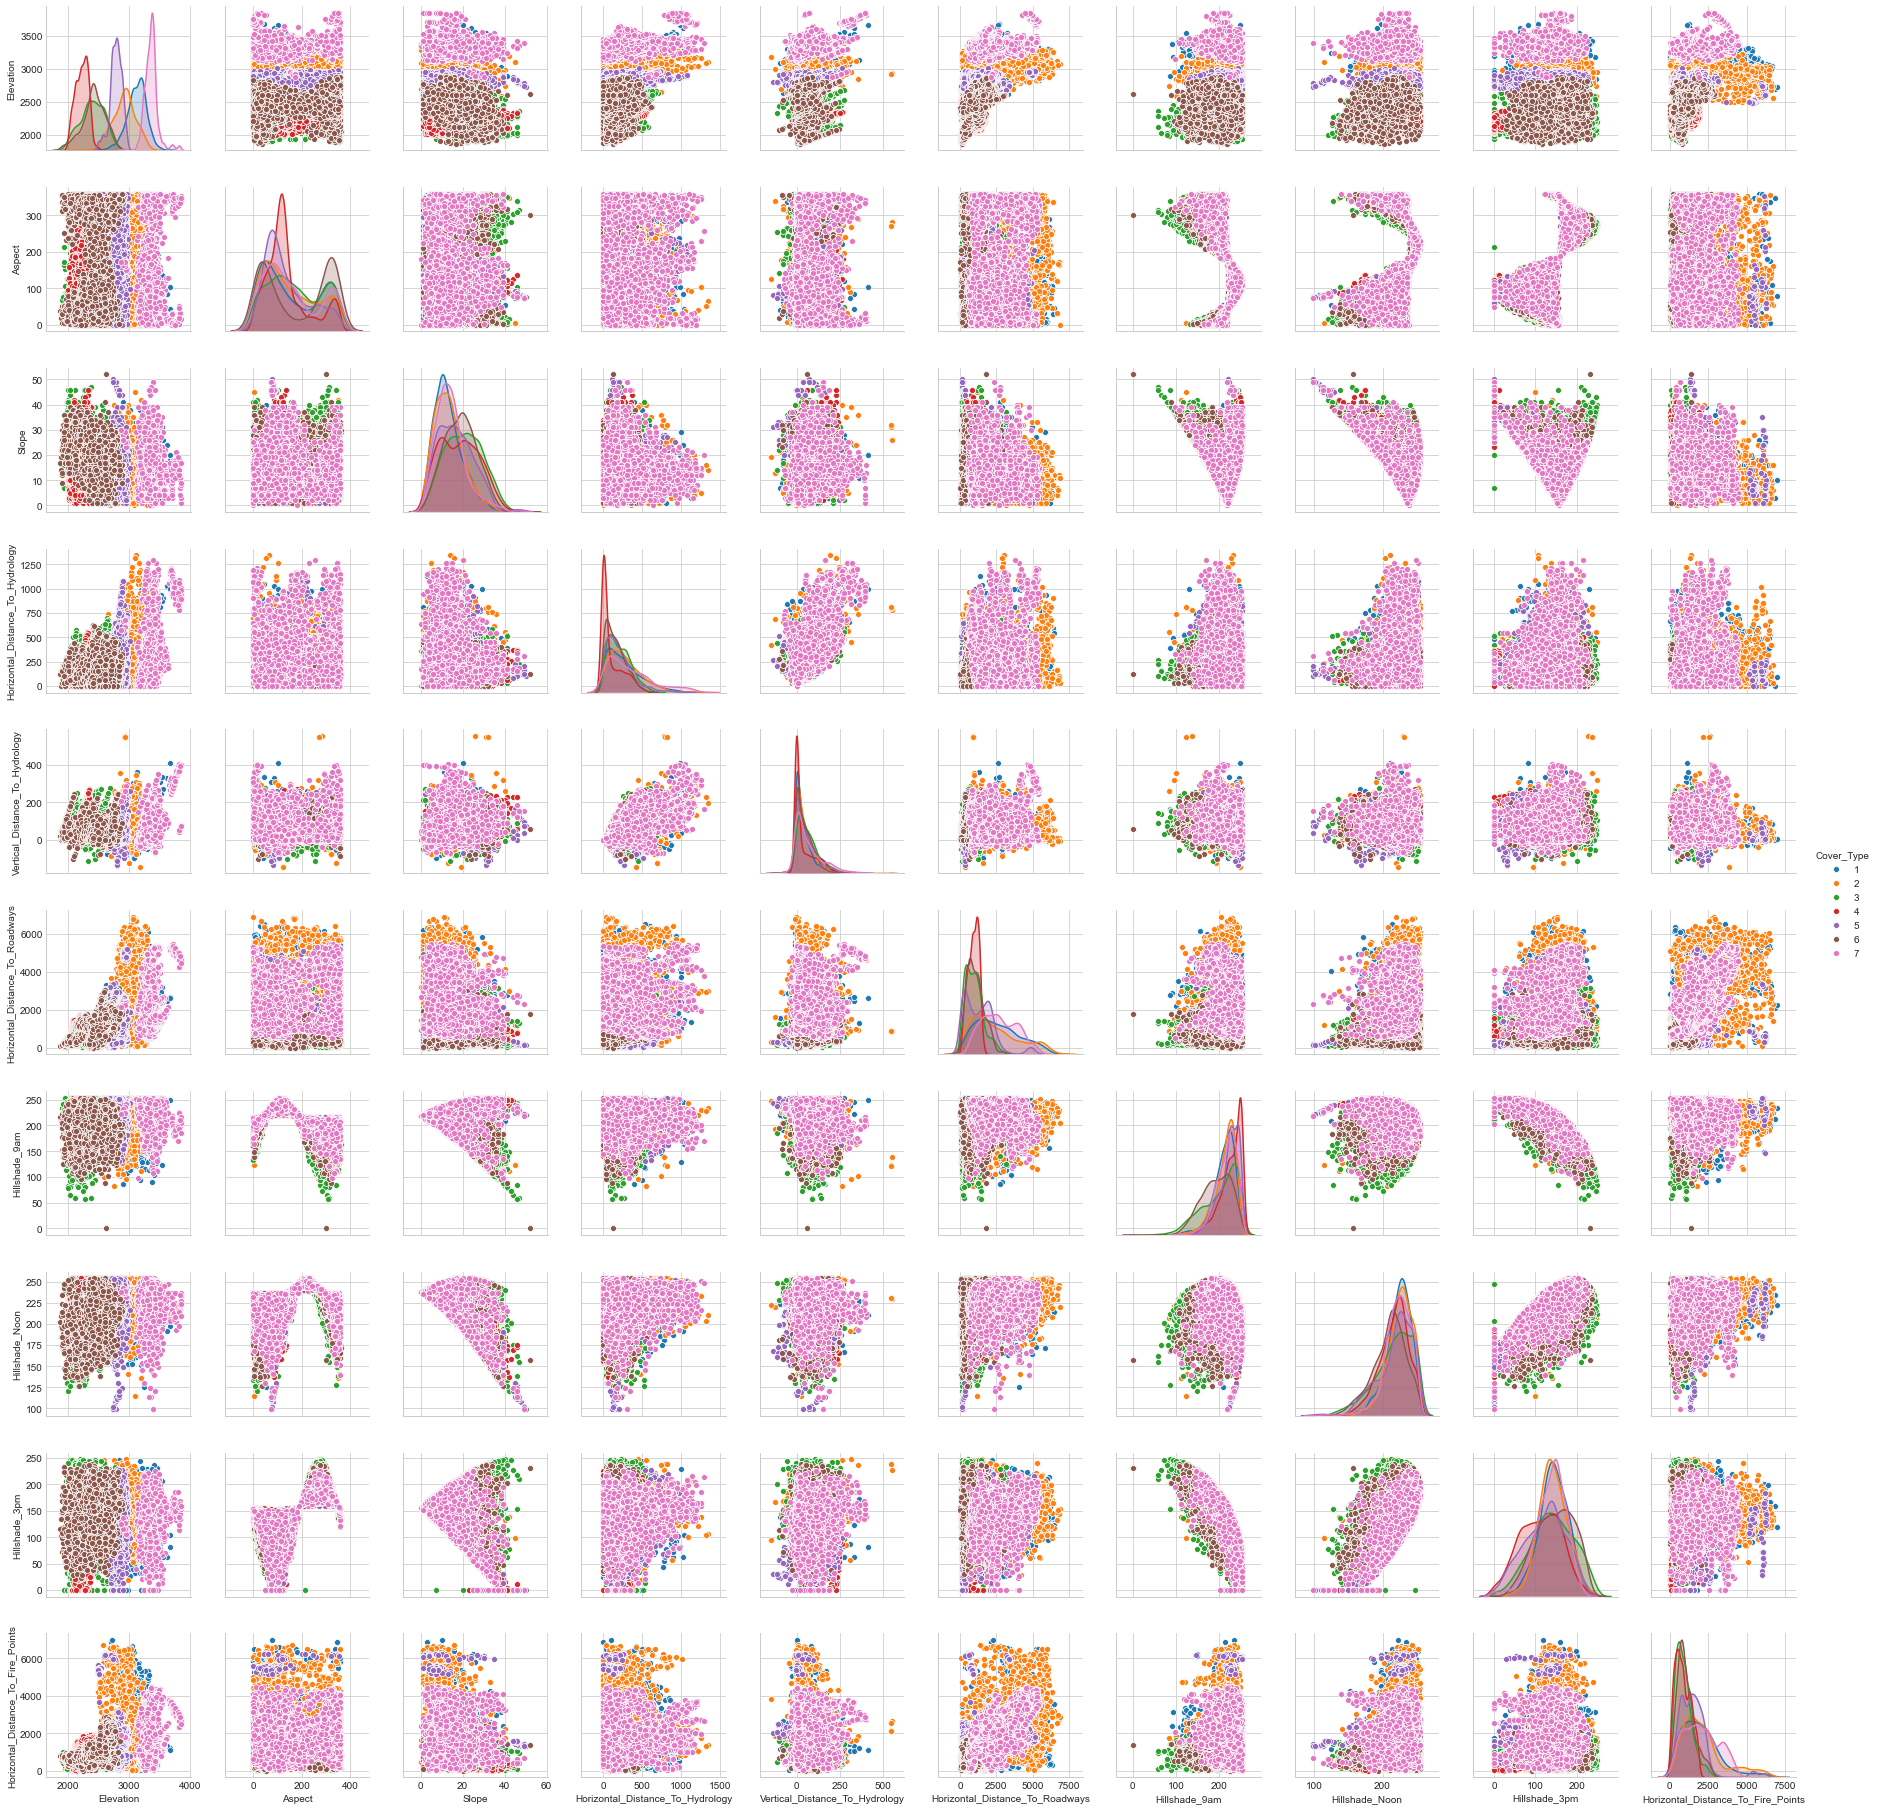

In [66]:
sns.pairplot(train_df, vars = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'], hue="Cover_Type")


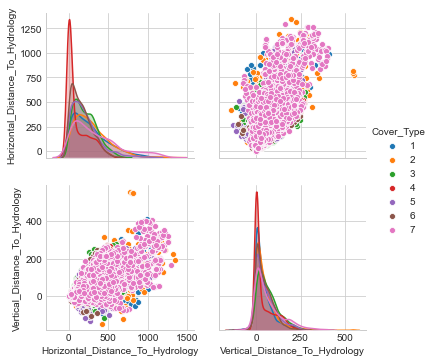

In [74]:
sns.pairplot(train_df, vars = [
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'
       ], hue="Cover_Type")

In [95]:

from sklearn.naive_bayes import GaussianNB
nbc_base = GaussianNB()

# Calculate accuracy of train
nbc_base_acc = cross_val_score(nbc_base, X_train, y_train).mean()
nbc_base_std = cross_val_score(nbc_base, X_train, y_train).std()
print('Accuracy of Naive Bayes Classifier (TRAIN): {} +/- {}'.format(round(nbc_base_acc, 2), round(nbc_base_std, 2)))

# Fit model
nbc_base.fit(X_train, y_train)

# Get predictions and probabilities
nbc_base_preds = nbc_base.predict(X_valid)
nbc_base_y_score = nbc_base.predict_proba(X_valid)

# Calculate accuracy of test
nbc_base_acc_test = round(accuracy_score(y_valid, nbc_base_preds), 2)
print(f'Accuracy of Naive Bayes Classifier (TEST): {nbc_base_acc_test}')

print()

# # Get precision, recall, f1-score
# precision, recall, fscore, support = score(y_valid, nbc_base_preds, average='macro')
# print(f'Precision : {precision}')
# print(f'Recall    : {recall}')
# print(f'F-score   : {fscore}')

Accuracy of Naive Bayes Classifier (TRAIN): 0.59 +/- 0.01
Accuracy of Naive Bayes Classifier (TEST): 0.6



In [97]:
from sklearn.linear_model import LogisticRegression
lr_baseline = LogisticRegression(random_state=1)

# Calculate accuracy of train
lr_base_acc = cross_val_score(lr_baseline, X_train, y_train).mean()
lr_base_std = cross_val_score(lr_baseline, X_train, y_train).std()
print('Accuracy of log reg baseline (TRAIN): {} +/- {}'.format(round(lr_base_acc, 2), round(lr_base_std, 2)))

# Fit model
lr_baseline.fit(X_train, y_train)

# Get predictions and probabilities
lr_base_preds = lr_baseline.predict(X_valid)
lr_base_y_score = lr_baseline.predict_proba(X_valid)

# Calculate accuracy of test
lr_base_acc_test = round(accuracy_score(y_valid, lr_base_preds), 2)
print(f'Accuracy of log reg baseline (TEST): {lr_base_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_valid, lr_base_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Accuracy of log reg baseline (TRAIN): 0.48 +/- 0.01
Accuracy of log reg baseline (TEST): 0.48



/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'score' is not defined